In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
from time import perf_counter
from tensorflow.keras.models import load_model

In [2]:
model = load_model(r"D:/Research/Model/model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [6]:
def number_of_elements(img):
    H = []
    S = []
    V = []
    for i in range(0,32):
        for j in range(0,32):
            H.append(img[i][j][0])
            S.append(img[i][j][1])
            V.append(img[i][j][2])
    return H, S, V

In [3]:
img_size = 32, 32
lower = np.array([105, 0, 0], dtype='uint8')
upper = np.array([118, 255, 255], dtype='uint8')


In [9]:
start = perf_counter()
pic = r"D:/Research/Frame/testImage/g1_test.png"
img = cv2.imread(pic)
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))
# H, S, V = number_of_elements(img)
skinRegionHSV = cv2.inRange(img,lower,upper)
img = cv2.blur(skinRegionHSV,(2,2))
_,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

# plt.imshow(img)
img = img.reshape(1,32,32,1)
test = model.predict(img)
np.set_printoptions(formatter={'float':'{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:',index+1)
print(perf_counter() - start)

[[0.0000 0.0000 0.0000 1.0000 0.0000 0.0000]]
Gesture: 4
0.05382720000000063


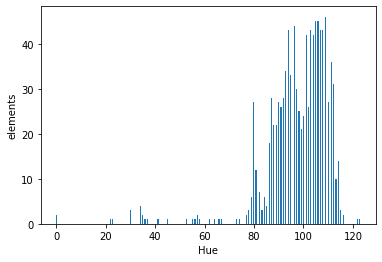

In [29]:
# H,S,V = number_of_elements(img)
h = collections.Counter(H)
s = collections.Counter(S)
v = collections.Counter(V)
new_h = sorted(H)
# plt.figure(figsize=(20,20))
# plt.subplot(2,2,1)
plt.xlabel('Hue')
plt.ylabel('elements')
plt.hist(new_h, bins=255)
plt.savefig("hue.png")
# plt.subplot(2,2,2)
# plt.hist(S,bins=255)
# plt.subplot(2,2,3)
# plt.hist(V,bins=255)

[[0.0000 0.0000 0.0000 1.0000 0.0000]]
Gesture: 4


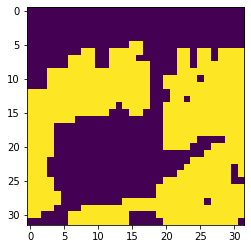

In [33]:
pic = r"D:/Research/Frame/testImage/g2_test.png"
img = cv2.imread(pic)
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 32, 32, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


[[0.0000 1.0000 0.0000 0.0000 0.0000]]
Gesture: 2


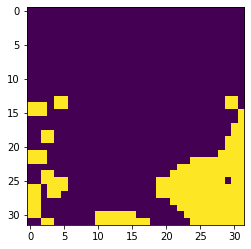

In [40]:
pic = r"D:/Research/Frame/testImage/g3_test.png"
img = cv2.imread(pic)
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 32, 32, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


[[0.0000 0.0000 0.0000 1.0000 0.0000]]
Gesture: 4


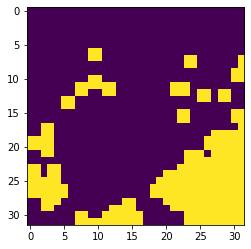

In [41]:
pic = r"D:/Research/Frame/testImage/g4_test.png"
img = cv2.imread(pic)
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 32, 32, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


[[0.0000 0.0000 0.0000 0.0000 1.0000]]
Gesture: 5


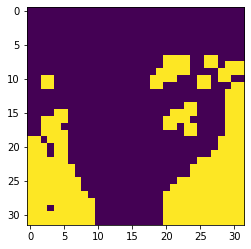

In [42]:
pic = r"D:/Research/Frame/testImage/g5_test.png"
img = cv2.imread(pic)
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.resize(img, (img_size))

skinRegionHSV = cv2.inRange(img, lower, upper)
img = cv2.blur(skinRegionHSV, (2, 2))
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
# # #輪郭抽出
# contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# # print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 1000,contours))
# cv2.drawContours(img,contours,-1,color=(0,0,255),thickness=2)
# # plt.imshow(thresh)

plt.imshow(img)
img = img.reshape(1, 32, 32, 1)
test = model.predict(img)
np.set_printoptions(formatter={'float': '{:.4f}'.format})
print(test)
index = np.argmax(test)
print('Gesture:', index + 1)


In [11]:
# lower = np.array([0,0,0],dtype='uint8')
# upper = np.array([90,10,255],dtype='uint8')
# skinRegionHSV = cv2.inRange(img, lower, upper)
# bin = cv2.blur(skinRegionHSV,(2,2))
# _,thresh = cv2.threshold(bin,0,255,cv2.THRESH_BINARY)
# plt.imshow(thresh)

In [12]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [13]:
# plt.imshow(thresh)

In [14]:
# #輪郭抽出
# contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
# contours = list(filter(lambda x: cv2.contourArea(x) > 50,contours))
# cv2.drawContours(thresh,contours,-1,color=(0,0,255),thickness=2)
# plt.imshow(thresh)

In [15]:
# for i in range(0,32):
#     for j in range(0,32):
#         if thresh[i][j] == 0:
#             thresh[i][j] = 255
#         else:
#             thresh[i][j] = 0

In [16]:
# thresh = thresh.reshape(1,64,64,1)

In [17]:
# test = model.predict(thresh)
# print(test)